In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns

mpg = pd.read_csv('data/mpg.csv')
mpg.loc[[64,123,130,152,211], "hwy"] = np.nan
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [15]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean=('hwy', 'mean'))


,mean
drv,
4,19.242424
f,28.200000
r,21.000000


In [35]:
# p.194 혼자서 해보기 이상치 적용
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

#1 
mpg['drv'].value_counts()


f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [36]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
mpg['drv'].value_counts()

drv
f      106
4      100
r       24
dtype: int64

<AxesSubplot:ylabel='cty'>

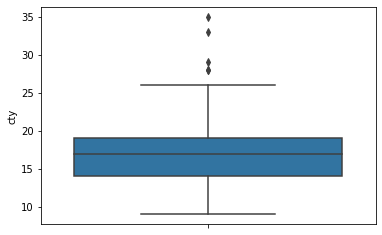

In [39]:
sns.boxplot(data = mpg, y='cty')

In [41]:
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [42]:
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [43]:
iqr = pct75 - pct25
pct25 - 1.5 * iqr

6.5

In [44]:
pct75 + 1.5 * iqr

26.5

In [47]:
mpg['cty'] = np.where((mpg['cty']<6.5) | (mpg['cty']>26.5), np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

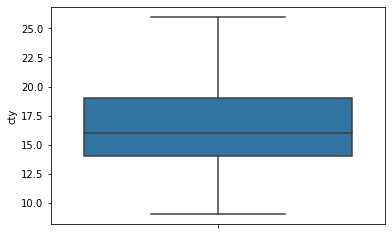

In [48]:
sns.boxplot(data = mpg, y = 'cty')

In [50]:
mpg.dropna(subset = ['drv', 'cty']).groupby('drv').agg(dty_mean = ('cty', 'mean'))

,dty_mean
drv,
4,14.330097
f,19.445545
r,14.080000
